In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [2]:
datasets = ["mnist", "mnistm", "svhn", "syn", "usps"]
ntl_file_directory = "../../logs/ntl/0/ntl_"
cuti_file_directory = "../../logs/cuti/ntl/0/cuti_"
local_file_directory = "../../logs/vgg11/local/"
ntp_file_directory = "../../logs/vgg11/lda/2/admm_"


In [3]:
def extract_floats(s):
    # Regular expression for matching floats
    pattern = r"[-+]?[0-9]*\.?[0-9]+"
    # Find all matches in the string
    matches = re.findall(pattern, s)
    # Convert all matches to float
    floats = [float(match) for match in matches]
    return floats

In [4]:
def read_file(file_path):
    results = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            if "Data ratio" in line:
                # Get the value after ":"
                line = line.split(":")[2].strip()
                data_ratio = extract_floats(line.split(",")[0].strip())[0]
                data_volume = extract_floats(line.split(",")[1].strip())[0]
                accuracy = extract_floats(line.split(",")[3].strip())[0]
                results[data_ratio] = accuracy
        return results

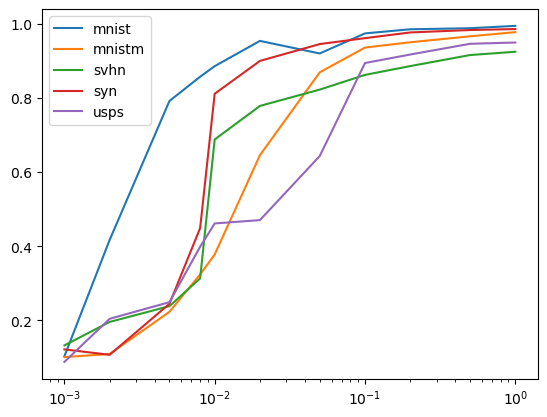

In [5]:
# load the local training results 
for target in datasets:
    file_path = local_file_directory + target + ".log"
    results = read_file(file_path)
    x = list(results.keys())
    y = list(results.values())
    plt.plot(x, y, label=target)
    # x axis log scale 
    plt.xscale("log")
plt.legend()

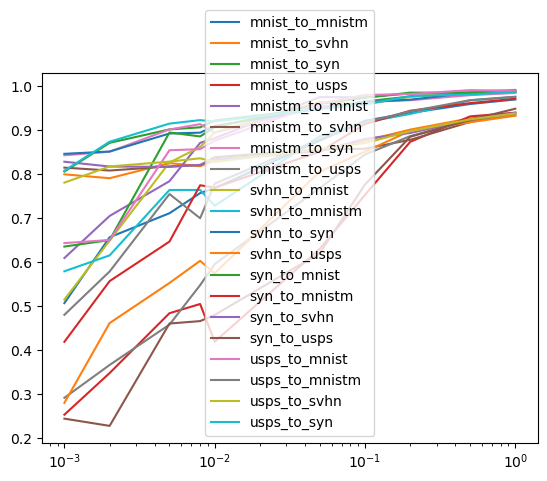

In [6]:
# load ntl transfer learning results
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = ntl_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.legend()

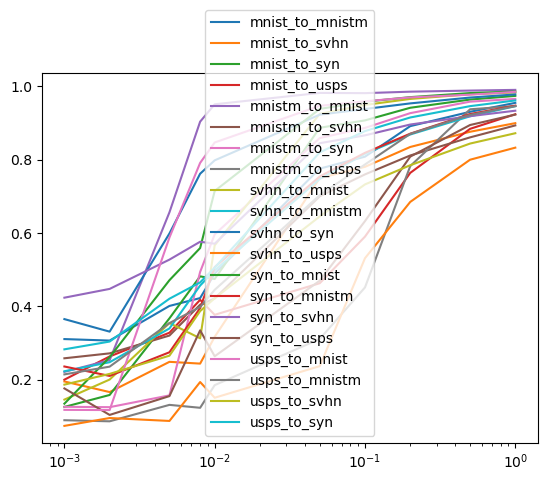

In [7]:
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = ntp_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.legend()

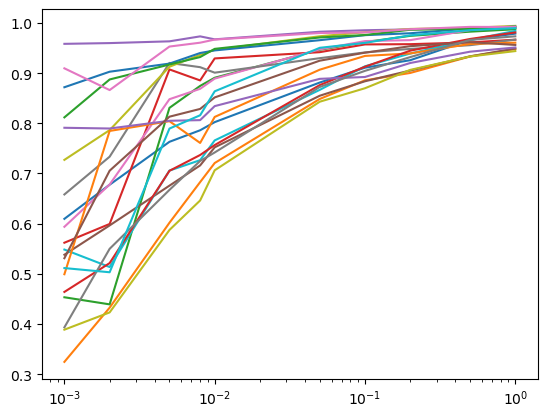

In [8]:
# cuti
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        file_path = cuti_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        plt.plot(x, y, label=source + "_to_" + target)
        # x axis log scale 
        plt.xscale("log")
plt.show()

In [9]:
def log_auc(xaxis, yaxis):
    auc = 0
    for i in range(1, len(xaxis)):
        # log scale area under the curve
        auc += (np.log(xaxis[i]) - np.log(xaxis[i - 1])) * (yaxis[i] + yaxis[i - 1]) / 2
    return auc

In [10]:
# compute the local AUC for target domains with local training 
local_auc = {}
for target in datasets:
    file_path = local_file_directory + target + ".log"
    results = read_file(file_path)
    x = list(results.keys())
    y = list(results.values())
    local_auc[target] = log_auc(x, y)
    print(target + " local AUC: " + str(log_auc(x, y)))

mnist local AUC: 5.736608628484431
mnistm local AUC: 4.3102402753183355
svhn local AUC: 4.447340588846244
syn local AUC: 4.893781124324538
usps local AUC: 4.060622035766099


In [11]:
ntl_aucs = {}
for source in datasets:
    ntl_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = ntl_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        ntl_aucs[source][target] = log_auc(x, y)
        
        print("ntl", source, target, log_auc(x, y))


ntl mnist mnistm 5.67774460885441
ntl mnist svhn 5.917675610859497
ntl mnist syn 6.450408594971629
ntl mnist usps 4.290705902937313
ntl mnistm mnist 6.155776794002832
ntl mnistm svhn 5.906977604995203
ntl mnistm syn 6.415920399434174
ntl mnistm usps 4.701729712290335
ntl svhn mnist 6.094307310680815
ntl svhn mnistm 5.687659321922877
ntl svhn syn 6.419011306826894
ntl svhn usps 4.892332404734076
ntl syn mnist 6.212996041707777
ntl syn mnistm 5.501115576188956
ntl syn svhn 5.941520471182078
ntl syn usps 4.2276389585238
ntl usps mnist 6.156675253433508
ntl usps mnistm 5.638633865410776
ntl usps svhn 5.936438864424349
ntl usps syn 6.457087873439101


In [42]:
ntp_aucs = {}
for source in datasets:
    ntp_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = ntp_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        ntp_aucs[source][target] = log_auc(x, y)
        
        print("ntp", source, target, log_auc(x, y))

ntp mnist mnistm 4.476215665774345
ntp mnist svhn 3.8399959574389477
ntp mnist syn 4.546966567365404
ntp mnist usps 3.5859955094231974
ntp mnistm mnist 5.66165435976212
ntp mnistm svhn 4.043266540100446
ntp mnistm syn 4.424557732800109
ntp mnistm usps 2.7856126354487074
ntp svhn mnist 4.711271320592651
ntp svhn mnistm 4.3173677972526034
ntp svhn syn 5.401069563060654
ntp svhn usps 2.4910943779984662
ntp syn mnist 5.088034009719565
ntp syn mnistm 4.250415224001579
ntp syn svhn 4.951018259543584
ntp syn usps 3.278231726818556
ntp usps mnist 5.254639734322788
ntp usps mnistm 4.1790354749028396
ntp usps svhn 3.8052869009656187
ntp usps syn 4.640888315874834


In [12]:
cuti_aucs = {}
for source in datasets:
    cuti_aucs[source] = {}
    for target in datasets:
        if source == target:
            continue
        file_path = cuti_file_directory + source + "_to_" + target + ".log"
        results = read_file(file_path)
        x = list(results.keys())
        y = list(results.values())
        cuti_aucs[source][target] = log_auc(x, y)
        
        print("cuti", source, target, log_auc(x, y))

cuti mnist mnistm 5.800467330559958
cuti mnist svhn 5.1695930346114665
cuti mnist syn 5.878693648959496
cuti mnist usps 6.0910715132573126
cuti mnistm mnist 6.743621063601756
cuti mnistm svhn 5.477367486352348
cuti mnistm syn 6.127843861564751
cuti mnistm usps 6.187517182329875
cuti svhn mnist 6.446504630812642
cuti svhn mnistm 5.551182744484526
cuti svhn syn 6.573274221815165
cuti svhn usps 5.921621208011558
cuti syn mnist 6.54958902500349
cuti syn mnistm 5.538345776468785
cuti syn svhn 5.981509638917895
cuti syn usps 5.972253941188545
cuti usps mnist 6.636530914075063
cuti usps mnistm 5.468426147121303
cuti usps svhn 5.134559502152605
cuti usps syn 5.884245257924746


In [14]:
# compute the auc differences as scores
cuti_scores = {}
for source in datasets:
    cuti_scores[source] = {}
    for target in datasets:
        if source == target:
            continue
        cuti_scores[source][target] = cuti_aucs[source][target] - local_auc[target]
        print("cuti", source, target, cuti_scores[source][target])

cuti mnist mnistm 1.4902270552416228
cuti mnist svhn 0.7222524457652222
cuti mnist syn 0.9849125246349582
cuti mnist usps 2.0304494774912136
cuti mnistm mnist 1.0070124351173249
cuti mnistm svhn 1.0300268975061035
cuti mnistm syn 1.2340627372402126
cuti mnistm usps 2.1268951465637764
cuti svhn mnist 0.709896002328211
cuti svhn mnistm 1.2409424691661908
cuti svhn syn 1.679493097490627
cuti svhn usps 1.8609991722454593
cuti syn mnist 0.812980396519059
cuti syn mnistm 1.2281055011504494
cuti syn svhn 1.5341690500716512
cuti syn usps 1.9116319054224462
cuti usps mnist 0.8999222855906321
cuti usps mnistm 1.1581858718029672
cuti usps svhn 0.6872189133063609
cuti usps syn 0.9904641336002085


In [13]:
# Compute the auc difference as score
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        print("ntl", source, target, ntl_aucs[source][target] - local_auc[target])

ntl mnist mnistm 1.3675043335360746
ntl mnist svhn 1.470335022013253
ntl mnist syn 1.5566274706470908
ntl mnist usps 0.23008386717121443
ntl mnistm mnist 0.41916816551840075
ntl mnistm svhn 1.4596370161489585
ntl mnistm syn 1.5221392751096356
ntl mnistm usps 0.6411076765242365
ntl svhn mnist 0.3576986821963839
ntl svhn mnistm 1.3774190466045413
ntl svhn syn 1.525230182502356
ntl svhn usps 0.8317103689679772
ntl syn mnist 0.4763874132233461
ntl syn mnistm 1.19087530087062
ntl syn svhn 1.4941798823358337
ntl syn usps 0.16701692275770075
ntl usps mnist 0.42006662494907676
ntl usps mnistm 1.3283935900924408
ntl usps svhn 1.4890982755781046
ntl usps syn 1.5633067491145631


In [68]:
# compute ntp scores 
for source in datasets:
    for target in datasets:
        if source == target:
            continue
        print("ntp", source, target, ntp_aucs[source][target] - local_auc[target])

ntp mnist mnistm 0.1659753904560093
ntp mnist svhn -0.6073446314072966
ntp mnist syn -0.3468145569591341
ntp mnist usps -0.4746265263429015
ntp mnistm mnist -0.07119936363370094
ntp mnistm svhn -0.4040740487457981
ntp mnistm syn -0.46922339152442927
ntp mnistm usps -1.2750094003173915
ntp svhn mnist -1.02158240280317
ntp svhn mnistm 0.007127521934267911
ntp svhn syn 0.5072884387361158
ntp svhn usps -1.5695276577676327
ntp syn mnist -0.6448197136762559
ntp syn mnistm -0.059825051316756195
ntp syn svhn 0.50367767069734
ntp syn usps -0.782390308947543
ntp usps mnist -0.4782139890730326
ntp usps mnistm -0.13120480041549598
ntp usps svhn -0.6420536878806256
ntp usps syn -0.25289280844970374
